<a href="https://colab.research.google.com/github/map72ru/python_data_lib/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Весь цикл добычи углеводородного сырья (УВС) требует значительных финансовых ресурсов и растянут по времени. Поэтому остро стоит вопрос о повышении эффестивности добычи уже существующих активов. На объемы добываемого УВС влияют черезвычайно много факторов: геологических, производственных, технологических, организационных. Построение комплексных моделей месторождений (их называют - интегрированными) и прогнозирование ни их основе будущей добычи является динамично развивающейся отраслью знаний в прикладной науке. Однако необходимо отметить, что данное направление относительно недавно начало развиваться и находится только в начале пути. На текущий момент интегрированные модели пытаются взаимно увязать геологические и производственные факторы. 
Данная работа посвещена сравнительному анализу суммарной месячной добычи двух месторождений с целью выявления статистически доказанного факта, что добыча на месторождении А больше, чем на месторождении B.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc

plt.style.use('fast')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

Исходные данные: месячная добыча УВС за последние 5 лет по двум месторождениям. Данные являются независимыми измерениями.

In [3]:
mestA = [31442,36114,35472,30521,31940,36410,29216,32964,35374,27110,30594,31210,30213,32077,31750,30251,30504,29608,28536,26229,28134,24654,28182,23841,27362,25032,25635,27153,26293,28106,26604,25206,24831,19235,23903,23784,21565,22368,21367,22514,22964,23604,25304,25869,21752,18164,22950,20011,15862,16281,14636,18695,16941,17556,16558,19731,19502,16328,18853]
mestB = [27476,25567,28286,29407,28108,28856,26333,26821,24213,21884,24186,21594,25455,25709,23467,24103,22723,23644,25686,26539,25036,21759,25735,27765,27307,21209,22442,23619,21415,22271,21244,24821,26499,22476,31551,31169,31935,24738,28827,29067,28301,29782,25755,31546,28277,25064,30856,28920,27516,25528,29436,30387,24838,27886,25743,26041,26578,24105,28002]

data = pd.DataFrame(list(zip(mestA, mestB)), columns=['A', 'B'])


Построим графики добычи по исходным данным

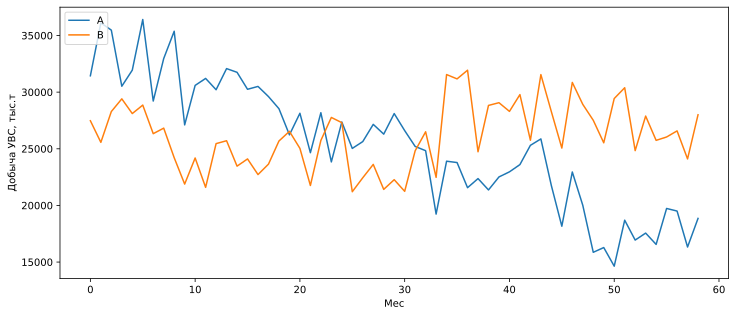

In [4]:

plt.plot(data)
plt.xlabel('Мес')
plt.ylabel('Добыча УВС, тыс.т')
plt.legend(labels=['A', 'B'], loc='upper left')

Средняя месячная добыча

In [5]:
data.mean()

A    25336.694915
B    26194.966102
dtype: float64

Выдвинем гипотезу Н0: Средняя_добыча_А >= Средняя_добыча_B, 
тогда H1: Средняя_добыча_В > Средняя_добыча_А

Посчитаем t статистику 

In [19]:
stat = sc.ttest_ind(data.B, data.A, axis=0, equal_var=False)
print('t=', stat.statistic)
print('Pv=', stat.pvalue) 

t= 1.0418541623639301
Pv= 0.3003809454209793


Согласно докумментации на функцию ttest_ind для одностороннего теста P_value должно быть поделено на 2 для сравнения с уровнем ошибки alfa. Примем alfa = 5%.

In [22]:
if stat.pvalue/2 < 0.05:
  print('Верна гипотеза H1')
else:
  print('Верна гипотеза Н0')

Верна гипотеза Н0


Альтернативный расчет по t-статистике. При alfa=5% и степенях свободы 118 табличное значение одностороннего t-распределения равно t_crit = 1.658. Если t-статистика < t_crit, то нельзя отклонить гипотезу H0. В нашем случае это истинное утверждение.